In [1]:
import pandas as pd



In [2]:
drug_df = pd.read_csv("Data/drug200.csv")
drug_df = drug_df.sample(frac=1)
drug_df.head(3)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
160,30,F,NORMAL,HIGH,10.443,drugX
4,61,F,LOW,HIGH,18.043,DrugY
126,66,M,HIGH,HIGH,16.347,DrugY


In [3]:
drug_df.Drug.describe()

count       200
unique        5
top       DrugY
freq         91
Name: Drug, dtype: object

In [4]:
from sklearn.model_selection import train_test_split

X = drug_df.drop("Drug", axis=1).values
y = drug_df.Drug.values

# With test_size=0.3 -> 30% of the data will be used for testing

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=125
)

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

cat_col = [1,2,3]
num_col = [0,4]

transform = ColumnTransformer(
    [
        ("encoder", OrdinalEncoder(), cat_col),
        ("num_imputer", SimpleImputer(strategy="median"), num_col),
        ("num_scaler", StandardScaler(), num_col),
    ]
)
pipe = Pipeline(
    steps=[
        ("preprocessing", transform),
        ("model", RandomForestClassifier(n_estimators=100, random_state=125)),
    ]
)

pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('encoder', OrdinalEncoder(),
                                                  [1, 2, 3]),
                                                 ('num_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  [0, 4]),
                                                 ('num_scaler',
                                                  StandardScaler(), [0, 4])])),
                ('model', RandomForestClassifier(random_state=125))])

In [6]:
from sklearn.metrics import accuracy_score, f1_score

predictions = pipe.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average="macro")

print("Accuracy:", str(round(accuracy, 2) * 100) + "%", "F1:", round(f1, 2))

Accuracy: 98.0% F1: 0.99


In [7]:
with open("Results/metrics.txt", "w") as outfile:
    outfile.write(f"\nAccuracy = {accuracy.round(2)}, F1 Score = {f1.round(2)}.")

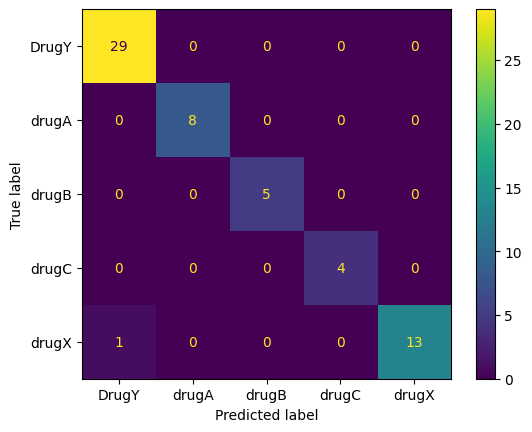

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, predictions, labels=pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
disp.plot()
plt.savefig("Results/model_results.png", dpi=120)

In [9]:
import skops.io as sio

sio.dump(pipe, "Model/drug_pipeline.skops")

In [16]:
from sklearn.exceptions import InconsistentVersionWarning
import warnings

warnings.filterwarnings("ignore", category=InconsistentVersionWarning)

# Explicitly specify trusted types
trusted_types = [
    "sklearn.pipeline.Pipeline",
    "sklearn.preprocessing.OneHotEncoder",
    "sklearn.preprocessing.StandardScaler",
    "sklearn.compose.ColumnTransformer",
    "sklearn.preprocessing.OrdinalEncoder",
    "sklearn.impute.SimpleImputer",
    "sklearn.tree.DecisionTreeClassifier",
    "sklearn.ensemble.RandomForestClassifier",
    "numpy.dtype",
]

sio.load("./Model/drug_pipeline.skops", trusted=trusted_types)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('encoder', OrdinalEncoder(),
                                                  [1, 2, 3]),
                                                 ('num_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  [0, 4]),
                                                 ('num_scaler',
                                                  StandardScaler(), [0, 4])])),
                ('model', RandomForestClassifier(random_state=125))])